<a href="https://colab.research.google.com/github/dayaiit/test/blob/main/L7_MML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Inner Product Spaces and Orthogonality for Machine Learning
# ===================================================
# This notebook demonstrates the concepts of inner product spaces and orthogonality
# in the context of machine learning applications.

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.datasets import load_iris, fetch_california_housing, load_breast_cancer
from sklearn.model_selection import train_test_split

# Set random seed for reproducibility
np.random.seed(42)

# Configure visualization settings
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = [10, 6]


1. INNER PRODUCTS AND NORMS
Vectors:
u = [2 3 1]
v = [1 4 2]

Inner product (dot product): <u, v> = 16

Norm of u: ||u|| = 3.7417
Norm of v: ||v|| = 4.5826

Cauchy-Schwarz inequality check:
|<u,v>| = 16
||u|| ||v|| = 17.1464
Is |<u,v>| ≤ ||u|| ||v||? Yes

Angle between vectors: 21.07 degrees


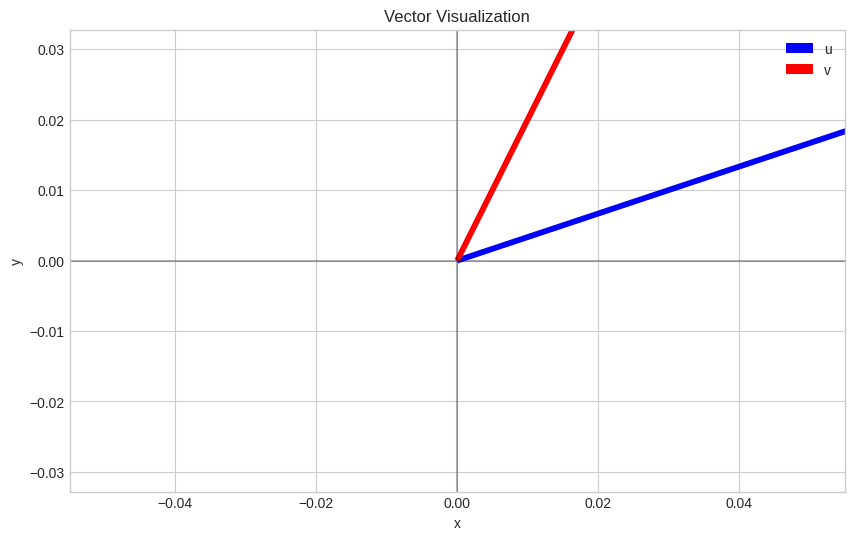

In [2]:
# ========================
# 1. BASIC INNER PRODUCTS
# ========================
print("=" * 50)
print("1. INNER PRODUCTS AND NORMS")
print("=" * 50)

# Let's define some simple vectors
u = np.array([2, 3, 1])
v = np.array([1, 4, 2])

# Compute the dot product (standard inner product in Euclidean space)
dot_product = np.dot(u, v)
print(f"Vectors:\nu = {u}\nv = {v}")
print(f"\nInner product (dot product): <u, v> = {dot_product}")

# Compute norms (lengths) of vectors
norm_u = np.linalg.norm(u)
norm_v = np.linalg.norm(v)
print(f"\nNorm of u: ||u|| = {norm_u:.4f}")
print(f"Norm of v: ||v|| = {norm_v:.4f}")

# Verify Cauchy-Schwarz inequality: |<u,v>| ≤ ||u|| ||v||
print("\nCauchy-Schwarz inequality check:")
print(f"|<u,v>| = {abs(dot_product)}")
print(f"||u|| ||v|| = {norm_u * norm_v:.4f}")
print(f"Is |<u,v>| ≤ ||u|| ||v||? {'Yes' if abs(dot_product) <= norm_u * norm_v else 'No'}")

# Compute angle between vectors using the dot product
angle_rad = np.arccos(dot_product / (norm_u * norm_v))
angle_deg = np.degrees(angle_rad)
print(f"\nAngle between vectors: {angle_deg:.2f} degrees")

# Let's visualize the vectors (for 2D vectors)
def plot_2d_vectors(vectors, labels):
    """Plot 2D vectors in a plane."""
    plt.figure()
    colors = ['blue', 'red', 'green', 'purple', 'orange']

    # Draw axes
    plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)

    # Draw vectors
    for i, v in enumerate(vectors):
        plt.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1,
                  color=colors[i % len(colors)], label=labels[i])

    # Set limits and labels
    plt.xlim([-5, 5])
    plt.ylim([-5, 5])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Vector Visualization')
    plt.grid(True)
    plt.legend()
    plt.axis('equal')
    plt.show()

# Create simple 2D vectors for visualization
u_2d = np.array([3, 1])
v_2d = np.array([1, 2])

# Visualize the 2D vectors
plot_2d_vectors([u_2d, v_2d], ['u', 'v'])



2. ORTHOGONALITY
Orthogonality check:
<w1, w2> = 0
<w1, w3> = 0
<w2, w3> = 0

Is y_orthogonal perpendicular to x?
<x, y_orthogonal> = 0

Is y_non_orthogonal perpendicular to x?
<x, y_non_orthogonal> = 5


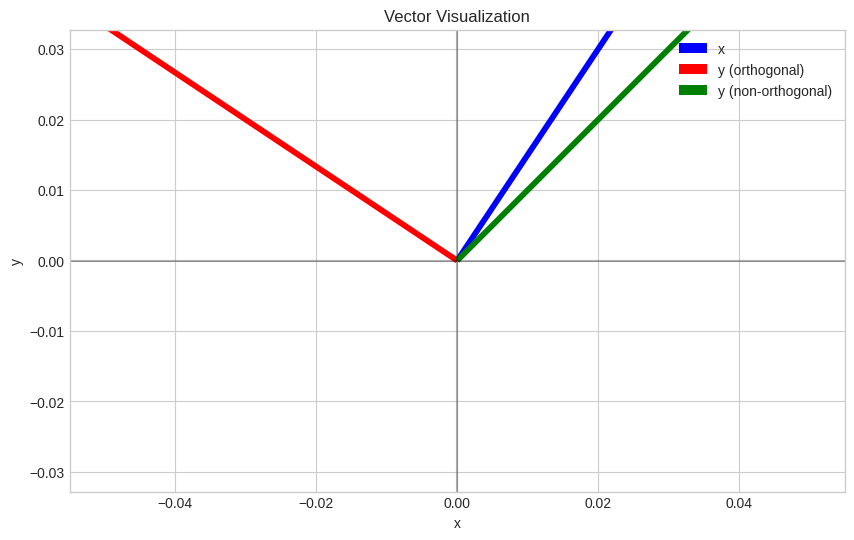

In [3]:
# ========================
# 2. ORTHOGONALITY
# ========================
print("\n" + "=" * 50)
print("2. ORTHOGONALITY")
print("=" * 50)

# Create orthogonal vectors
w1 = np.array([1, 0, 0])  # x-axis unit vector
w2 = np.array([0, 1, 0])  # y-axis unit vector
w3 = np.array([0, 0, 1])  # z-axis unit vector

# Verify orthogonality
print(f"Orthogonality check:")
print(f"<w1, w2> = {np.dot(w1, w2)}")
print(f"<w1, w3> = {np.dot(w1, w3)}")
print(f"<w2, w3> = {np.dot(w2, w3)}")

# Let's create another set of vectors - one orthogonal and one not
x = np.array([2, 3])
y_orthogonal = np.array([-3, 2])  # Orthogonal to x (perpendicular)
y_non_orthogonal = np.array([1, 1])  # Not orthogonal to x

# Check orthogonality
print(f"\nIs y_orthogonal perpendicular to x?")
print(f"<x, y_orthogonal> = {np.dot(x, y_orthogonal)}")

print(f"\nIs y_non_orthogonal perpendicular to x?")
print(f"<x, y_non_orthogonal> = {np.dot(x, y_non_orthogonal)}")

# Visualize orthogonal and non-orthogonal vectors
plot_2d_vectors([x, y_orthogonal, y_non_orthogonal],
                ['x', 'y (orthogonal)', 'y (non-orthogonal)'])



3. PROJECTIONS
Vector u: [2 0]
Vector v: [3 4]
Projection of v onto u: [3. 0.]
Orthogonal component: [0. 4.]

Orthogonality check: <orthogonal_component, u> = 0.0


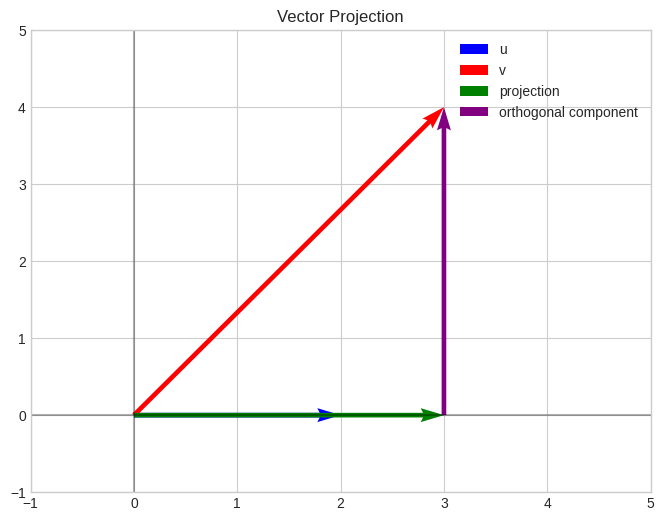

In [4]:
# ========================
# 3. PROJECTIONS
# ========================
print("\n" + "=" * 50)
print("3. PROJECTIONS")
print("=" * 50)

def project_vector(v, u):
    """Project vector v onto vector u."""
    # Calculate (v·u / u·u) * u
    return (np.dot(v, u) / np.dot(u, u)) * u

# Define vectors
u_proj = np.array([2, 0])  # Vector onto which we'll project
v_proj = np.array([3, 4])  # Vector to be projected

# Calculate projection
projection = project_vector(v_proj, u_proj)
orthogonal_component = v_proj - projection

print(f"Vector u: {u_proj}")
print(f"Vector v: {v_proj}")
print(f"Projection of v onto u: {projection}")
print(f"Orthogonal component: {orthogonal_component}")

# Verify that the orthogonal component is perpendicular to u
print(f"\nOrthogonality check: <orthogonal_component, u> = {np.dot(orthogonal_component, u_proj)}")

# Visualize projection
plt.figure(figsize=(8, 6))
plt.quiver(0, 0, u_proj[0], u_proj[1], angles='xy', scale_units='xy', scale=1, color='blue', label='u')
plt.quiver(0, 0, v_proj[0], v_proj[1], angles='xy', scale_units='xy', scale=1, color='red', label='v')
plt.quiver(0, 0, projection[0], projection[1], angles='xy', scale_units='xy', scale=1, color='green', label='projection')
plt.quiver(projection[0], projection[1], orthogonal_component[0], orthogonal_component[1],
          angles='xy', scale_units='xy', scale=1, color='purple', label='orthogonal component')

plt.xlim([-1, 5])
plt.ylim([-1, 5])
plt.grid(True)
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
plt.legend()
plt.title('Vector Projection')
plt.show()


In [5]:
# ========================
# 4. GRAM-SCHMIDT PROCESS
# ========================
print("\n" + "=" * 50)
print("4. GRAM-SCHMIDT ORTHOGONALIZATION")
print("=" * 50)

def gram_schmidt(vectors):
    """
    Apply the Gram-Schmidt process to a set of vectors.

    Args:
        vectors: List of numpy arrays

    Returns:
        List of orthogonal vectors
    """
    orthogonal_vectors = []

    for v in vectors:
        # Start with the original vector
        w = v.copy()

        # Subtract projections onto previous orthogonal vectors
        for u in orthogonal_vectors:
            w = w - project_vector(v, u)

        orthogonal_vectors.append(w)

    return orthogonal_vectors

# Let's create non-orthogonal vectors in 3D
v1 = np.array([1, 1, 0])
v2 = np.array([1, 0, 1])
v3 = np.array([0, 1, 1])

# Apply Gram-Schmidt
orthogonal_basis = gram_schmidt([v1, v2, v3])

# Print the results
print("Original vectors:")
print(f"v1 = {v1}")
print(f"v2 = {v2}")
print(f"v3 = {v3}")

print("\nOrthogonal basis:")
for i, v in enumerate(orthogonal_basis):
    print(f"w{i+1} = {v}")

# Verify orthogonality
print("\nVerifying orthogonality:")
print(f"<w1, w2> = {np.dot(orthogonal_basis[0], orthogonal_basis[1]):.10f}")
print(f"<w1, w3> = {np.dot(orthogonal_basis[0], orthogonal_basis[2]):.10f}")
print(f"<w2, w3> = {np.dot(orthogonal_basis[1], orthogonal_basis[2]):.10f}")

# Normalize to create orthonormal basis
orthonormal_basis = [v / np.linalg.norm(v) for v in orthogonal_basis]

print("\nOrthonormal basis (unit vectors):")
for i, v in enumerate(orthonormal_basis):
    print(f"u{i+1} = {v}")
    print(f"||u{i+1}|| = {np.linalg.norm(v):.10f}")



4. GRAM-SCHMIDT ORTHOGONALIZATION
Original vectors:
v1 = [1 1 0]
v2 = [1 0 1]
v3 = [0 1 1]

Orthogonal basis:
w1 = [1 1 0]
w2 = [ 0.5 -0.5  1. ]
w3 = [-0.66666667  0.66666667  0.66666667]

Verifying orthogonality:
<w1, w2> = 0.0000000000
<w1, w3> = 0.0000000000
<w2, w3> = 0.0000000000

Orthonormal basis (unit vectors):
u1 = [0.70710678 0.70710678 0.        ]
||u1|| = 1.0000000000
u2 = [ 0.40824829 -0.40824829  0.81649658]
||u2|| = 1.0000000000
u3 = [-0.57735027  0.57735027  0.57735027]
||u3|| = 1.0000000000



5. ML APPLICATION: LINEAR REGRESSION AND PROJECTIONS


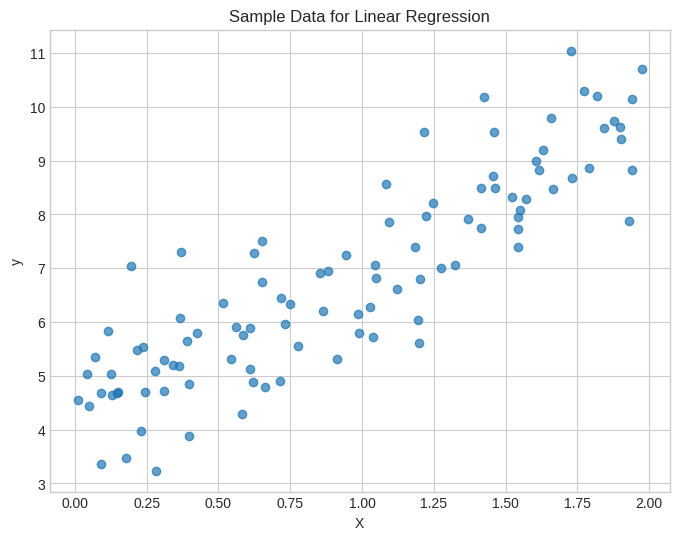

Model parameters (theta):
Intercept: 4.2151
Slope: 2.7701

Orthogonality check for residuals:
<residuals, X_b[:, 0]> = 0.0000000000
<residuals, X_b[:, 1]> = 0.0000000000


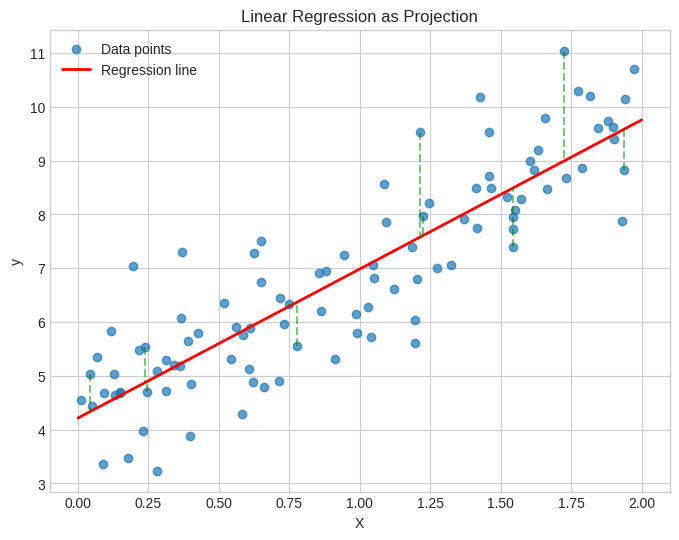

In [6]:
# ========================
# 5. ML APPLICATION: LINEAR REGRESSION
# ========================
print("\n" + "=" * 50)
print("5. ML APPLICATION: LINEAR REGRESSION AND PROJECTIONS")
print("=" * 50)

# Generate some sample data for linear regression
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Visualize the data
plt.figure(figsize=(8, 6))
plt.scatter(X, y, alpha=0.7)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Sample Data for Linear Regression')
plt.show()

# Let's understand linear regression in terms of projections
# First, add a column of ones to X for the intercept
X_b = np.c_[np.ones((100, 1)), X]

# Compute the projection matrix
# The hat matrix H = X(X^TX)^(-1)X^T projects y onto the column space of X
X_b_T = X_b.T
X_b_T_X_b = X_b_T.dot(X_b)
X_b_T_X_b_inv = np.linalg.inv(X_b_T_X_b)
hat_matrix = X_b.dot(X_b_T_X_b_inv).dot(X_b_T)

# Calculate the model parameters using the normal equation
# This is equivalent to projecting y onto the column space of X
theta = X_b_T_X_b_inv.dot(X_b_T).dot(y)

print(f"Model parameters (theta):")
print(f"Intercept: {theta[0][0]:.4f}")
print(f"Slope: {theta[1][0]:.4f}")

# Calculate y_hat (the projection of y onto the column space of X)
y_hat = X_b.dot(theta)

# Calculate the residuals (the orthogonal component)
residuals = y - y_hat

# Verify that residuals are orthogonal to X (the columns of X_b)
orthogonality_check1 = np.dot(X_b[:, 0], residuals.flatten())
orthogonality_check2 = np.dot(X_b[:, 1], residuals.flatten())

print(f"\nOrthogonality check for residuals:")
print(f"<residuals, X_b[:, 0]> = {orthogonality_check1:.10f}")
print(f"<residuals, X_b[:, 1]> = {orthogonality_check2:.10f}")

# Visualize the regression line
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta)

plt.figure(figsize=(8, 6))
plt.scatter(X, y, alpha=0.7, label='Data points')
plt.plot(X_new, y_predict, 'r-', linewidth=2, label='Regression line')

# Visualize a few residuals
for i in range(0, 100, 10):
    plt.plot([X[i], X[i]], [y[i], y_hat[i]], 'g--', alpha=0.5)

plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Linear Regression as Projection')
plt.show()



6. ML APPLICATION: PRINCIPAL COMPONENT ANALYSIS
Principal components (first 2):
[[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]]

Orthogonality check of first two principal components: -0.0000000000


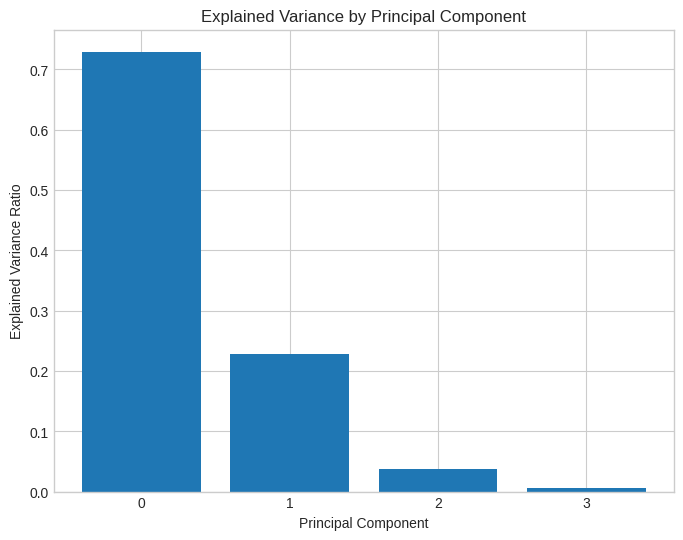

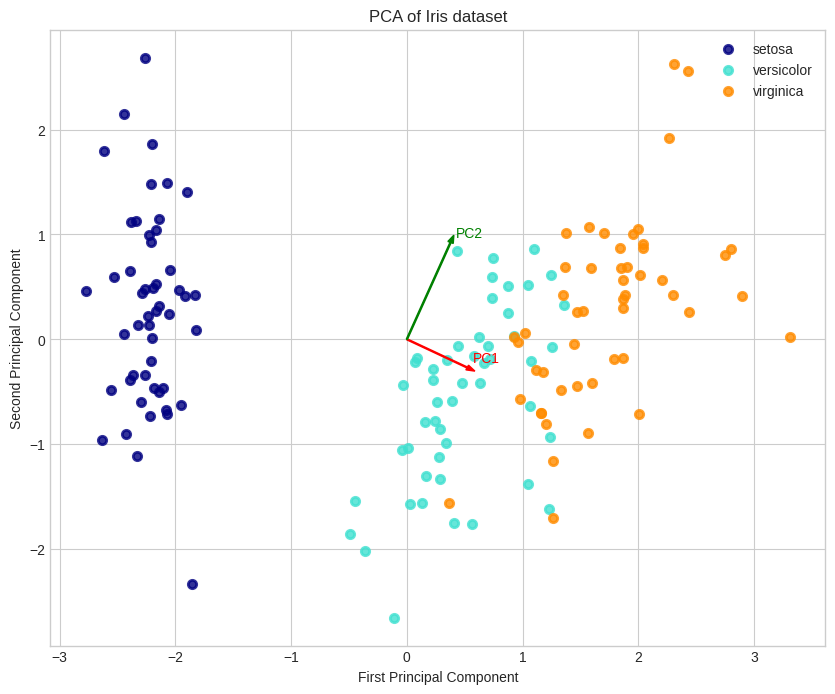

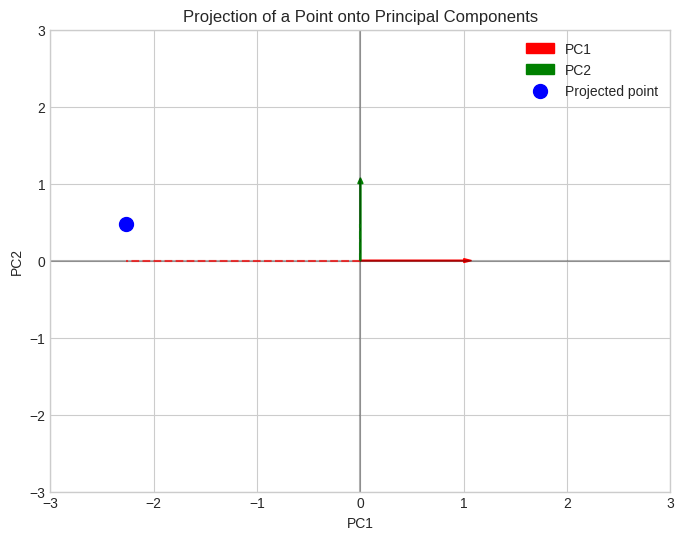

In [7]:
# ========================
# 6. ML APPLICATION: PRINCIPAL COMPONENT ANALYSIS (PCA)
# ========================
print("\n" + "=" * 50)
print("6. ML APPLICATION: PRINCIPAL COMPONENT ANALYSIS")
print("=" * 50)

# Let's use the Iris dataset
iris = load_iris()
X_iris = iris.data
y_iris = iris.target

# Standardize the data
scaler = StandardScaler()
X_iris_scaled = scaler.fit_transform(X_iris)

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_iris_scaled)

# Examine the principal components (eigenvectors)
print("Principal components (first 2):")
print(pca.components_[:2])

# Check orthogonality of principal components
orthogonality_check = np.dot(pca.components_[0], pca.components_[1])
print(f"\nOrthogonality check of first two principal components: {orthogonality_check:.10f}")

# Plot the explained variance ratio
plt.figure(figsize=(8, 6))
plt.bar(range(4), pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Component')
plt.xticks(range(4))
plt.show()

# Plot the first two principal components
plt.figure(figsize=(10, 8))
colors = ['navy', 'turquoise', 'darkorange']
target_names = iris.target_names

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_pca[y_iris == i, 0], X_pca[y_iris == i, 1],
                color=color, alpha=0.8, lw=2, label=target_name)

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of Iris dataset')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.grid(True)

# Add vectors representing the principal components
plt.arrow(0, 0, pca.components_[0, 0], pca.components_[0, 1],
          color='red', width=0.01, head_width=0.05)
plt.arrow(0, 0, pca.components_[1, 0], pca.components_[1, 1],
          color='green', width=0.01, head_width=0.05)

plt.text(pca.components_[0, 0] + 0.05, pca.components_[0, 1] + 0.05, 'PC1', color='red')
plt.text(pca.components_[1, 0] + 0.05, pca.components_[1, 1] + 0.05, 'PC2', color='green')

plt.show()

# Visualize the projection of a data point onto principal components
sample_point = X_iris_scaled[0]
projection_pc1 = project_vector(sample_point, pca.components_[0])
projection_pc2 = project_vector(sample_point, pca.components_[1])

# Convert to 2D for visualization
projection_pc1_2d = np.array([np.dot(sample_point, pca.components_[0]), 0])
projection_pc2_2d = np.array([0, np.dot(sample_point, pca.components_[1])])
sample_point_2d = np.array([projection_pc1_2d[0], projection_pc2_2d[1]])

plt.figure(figsize=(8, 6))
# Draw original axes
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)

# Draw principal component axes
plt.arrow(0, 0, 1, 0, color='red', width=0.01, head_width=0.05, label='PC1')
plt.arrow(0, 0, 0, 1, color='green', width=0.01, head_width=0.05, label='PC2')

# Draw the projections
plt.scatter(sample_point_2d[0], sample_point_2d[1], color='blue', s=100, label='Projected point')
plt.plot([0, sample_point_2d[0]], [0, 0], 'r--', alpha=0.7)
plt.plot([0, 0], [0, sample_point_2d[1]], 'g--', alpha=0.7)

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Projection of a Point onto Principal Components')
plt.legend()
plt.grid(True)
plt.show()



7. ML APPLICATION: COSINE SIMILARITY FOR RECOMMENDATIONS
Cosine similarity matrix:
[[1.         0.91686566 0.21276596 0.2363283  0.94669725]
 [0.91686566 1.         0.4480139  0.37473671 0.90211682]
 [0.21276596 0.4480139  1.         0.72023862 0.26865733]
 [0.2363283  0.37473671 0.72023862 1.         0.47366547]
 [0.94669725 0.90211682 0.26865733 0.47366547 1.        ]]


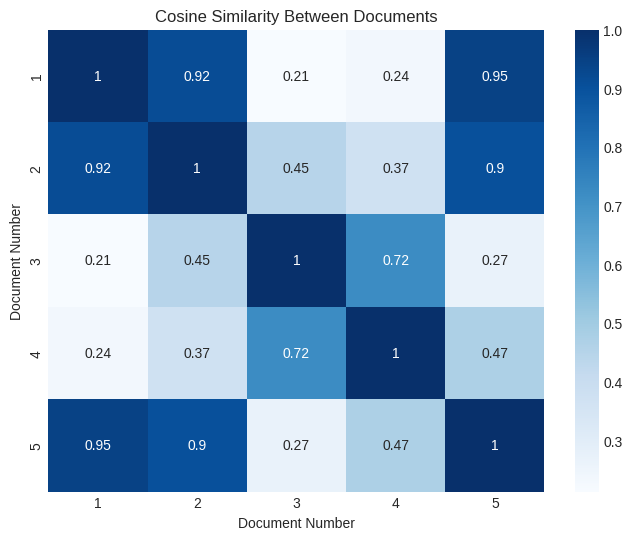


Most similar document to Document 1: Document 4
Similarity score: 0.2363

Manual calculation for Documents 1 and 2:
Inner product: 0.8800
Norm of Document 1: 0.9695
Norm of Document 2: 0.9899
Cosine similarity: 0.9169
Cosine similarity from matrix: 0.9169


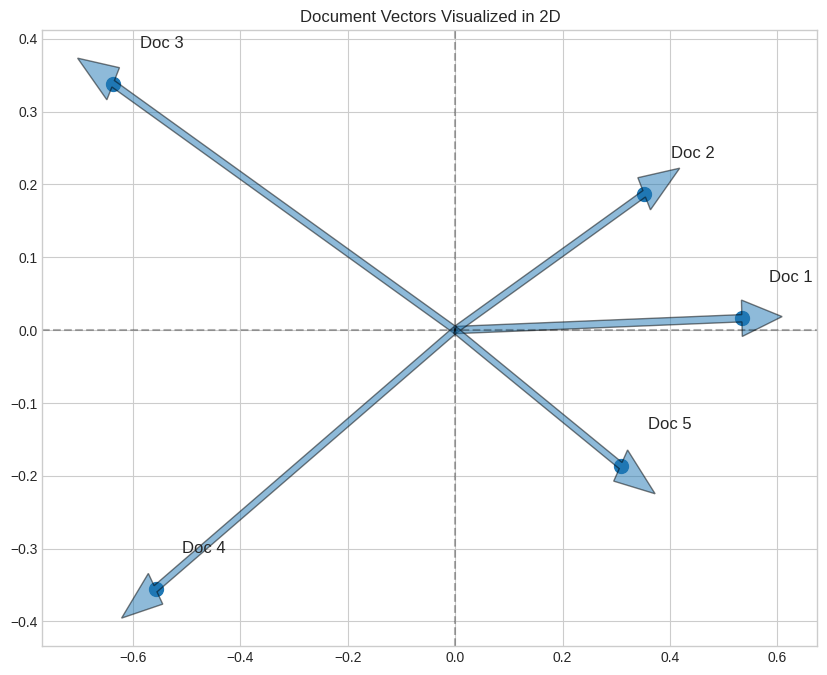

In [8]:
# ========================
# 7. ML APPLICATION: COSINE SIMILARITY FOR RECOMMENDATIONS
# ========================
print("\n" + "=" * 50)
print("7. ML APPLICATION: COSINE SIMILARITY FOR RECOMMENDATIONS")
print("=" * 50)

# Create a simple document-term matrix (as in TF-IDF vectors)
# Rows are documents, columns are terms (words)
documents = np.array([
    [0.2, 0.5, 0.8, 0.1, 0.0],  # Document 1
    [0.0, 0.6, 0.7, 0.2, 0.3],  # Document 2
    [0.1, 0.2, 0.0, 0.8, 0.5],  # Document 3
    [0.5, 0.0, 0.1, 0.3, 0.7],  # Document 4
    [0.3, 0.4, 0.6, 0.0, 0.2]   # Document 5
])

# Compute cosine similarity matrix
cosine_sim = cosine_similarity(documents)

# Print the similarity matrix
print("Cosine similarity matrix:")
print(cosine_sim)

# Visualize the similarity matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cosine_sim, annot=True, cmap='Blues', xticklabels=range(1, 6), yticklabels=range(1, 6))
plt.title('Cosine Similarity Between Documents')
plt.xlabel('Document Number')
plt.ylabel('Document Number')
plt.show()

# Find the most similar document to Document 1
doc_index = 0
similarities = cosine_sim[doc_index]
most_similar_index = np.argmax(similarities[~np.eye(len(similarities), dtype=bool)[doc_index]])
print(f"\nMost similar document to Document 1: Document {most_similar_index + 1}")
print(f"Similarity score: {similarities[most_similar_index]:.4f}")

# Let's verify cosine similarity manually
doc1 = documents[0]
doc2 = documents[1]

# Compute inner product (dot product)
dot_prod = np.dot(doc1, doc2)

# Compute norms
norm_doc1 = np.linalg.norm(doc1)
norm_doc2 = np.linalg.norm(doc2)

# Compute cosine similarity
cos_sim_manual = dot_prod / (norm_doc1 * norm_doc2)

print(f"\nManual calculation for Documents 1 and 2:")
print(f"Inner product: {dot_prod:.4f}")
print(f"Norm of Document 1: {norm_doc1:.4f}")
print(f"Norm of Document 2: {norm_doc2:.4f}")
print(f"Cosine similarity: {cos_sim_manual:.4f}")
print(f"Cosine similarity from matrix: {cosine_sim[0, 1]:.4f}")

# Visualize documents as vectors in 2D using PCA
pca_docs = PCA(n_components=2)
documents_2d = pca_docs.fit_transform(documents)

plt.figure(figsize=(10, 8))
plt.scatter(documents_2d[:, 0], documents_2d[:, 1], s=100)

# Label each point
for i in range(len(documents_2d)):
    plt.text(documents_2d[i, 0] + 0.05, documents_2d[i, 1] + 0.05, f'Doc {i+1}', fontsize=12)

# Draw vectors from origin to each document
for i in range(len(documents_2d)):
    plt.arrow(0, 0, documents_2d[i, 0], documents_2d[i, 1],
              width=0.01, head_width=0.05, alpha=0.5)

plt.title('Document Vectors Visualized in 2D')
plt.axhline(y=0, color='k', linestyle='--', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='--', alpha=0.3)
plt.grid(True)
plt.show()



8. ML APPLICATION: ORTHOGONAL MATRICES IN NEURAL NETWORKS
Random matrix:
[[ 0.49671415 -0.1382643   0.64768854  1.52302986]
 [-0.23415337 -0.23413696  1.57921282  0.76743473]
 [-0.46947439  0.54256004 -0.46341769 -0.46572975]
 [ 0.24196227 -1.91328024 -1.72491783 -0.56228753]]

Orthogonal matrix (Q from QR decomposition):
[[-0.65193405  0.27665475  0.24146099 -0.66343103]
 [ 0.30732476 -0.30022049  0.89738645 -0.1005818 ]
 [ 0.61618204 -0.02782107 -0.30180808 -0.72695087]
 [-0.31757389 -0.91244495 -0.21285213 -0.14589381]]

Verifying Q^T Q ≈ I:
[[ 1.00000000e+00 -2.21824876e-18 -3.74199402e-17  1.12484190e-16]
 [-2.21824876e-18  1.00000000e+00 -8.25978288e-17  7.28398702e-17]
 [-3.74199402e-17 -8.25978288e-17  1.00000000e+00 -3.89926517e-16]
 [ 1.12484190e-16  7.28398702e-17 -3.89926517e-16  1.00000000e+00]]

Original vector: [1 2 3 4]
Transformed vector: [-2.02796571  1.99671595 -3.25268782 -3.36459543]
Original norm: 5.4772
Transformed norm: 5.4772


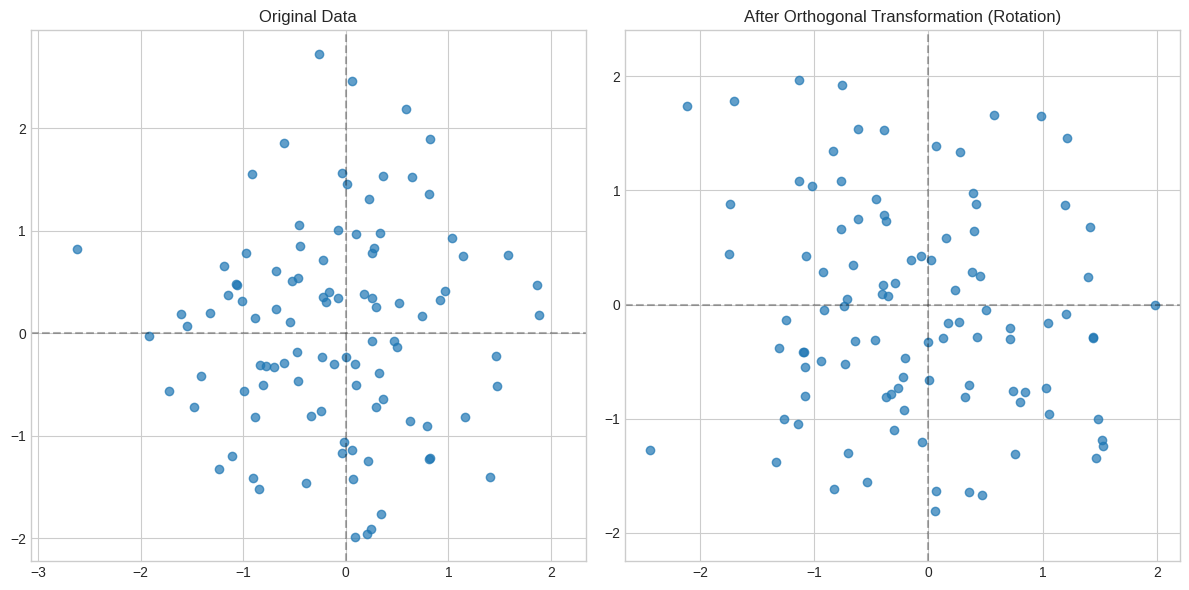

In [9]:
# ========================
# 8. ML APPLICATION: ORTHOGONAL MATRICES IN NEURAL NETWORKS
# ========================
print("\n" + "=" * 50)
print("8. ML APPLICATION: ORTHOGONAL MATRICES IN NEURAL NETWORKS")
print("=" * 50)

# Create a random matrix
np.random.seed(42)
random_matrix = np.random.randn(4, 4)
print("Random matrix:")
print(random_matrix)

# Make it orthogonal using QR decomposition
# QR decomposition factors a matrix A into Q (orthogonal) and R (upper triangular)
Q, R = np.linalg.qr(random_matrix)

print("\nOrthogonal matrix (Q from QR decomposition):")
print(Q)

# Verify orthogonality: Q^T Q should be identity
orthogonality_check = np.dot(Q.T, Q)
print("\nVerifying Q^T Q ≈ I:")
print(orthogonality_check)

# Demonstrate that orthogonal transformations preserve norms
vector = np.array([1, 2, 3, 4])
transformed_vector = np.dot(Q, vector)

print(f"\nOriginal vector: {vector}")
print(f"Transformed vector: {transformed_vector}")
print(f"Original norm: {np.linalg.norm(vector):.4f}")
print(f"Transformed norm: {np.linalg.norm(transformed_vector):.4f}")

# Visualize the effect of an orthogonal transformation in 2D
# We'll use a 2x2 orthogonal matrix (rotation matrix)
theta = np.pi/4  # 45 degrees rotation
rotation_matrix = np.array([
    [np.cos(theta), -np.sin(theta)],
    [np.sin(theta), np.cos(theta)]
])

# Generate some random 2D data
np.random.seed(42)
data_2d = np.random.randn(100, 2)

# Apply the rotation
rotated_data = np.dot(data_2d, rotation_matrix.T)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(data_2d[:, 0], data_2d[:, 1], alpha=0.7)
plt.title('Original Data')
plt.grid(True)
plt.axhline(y=0, color='k', linestyle='--', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='--', alpha=0.3)
plt.axis('equal')

plt.subplot(1, 2, 2)
plt.scatter(rotated_data[:, 0], rotated_data[:, 1], alpha=0.7)
plt.title('After Orthogonal Transformation (Rotation)')
plt.grid(True)
plt.axhline(y=0, color='k', linestyle='--', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='--', alpha=0.3)
plt.axis('equal')

plt.tight_layout()
plt.show()


In [10]:

# ========================
# 9. EXERCISES FOR STUDENTS
# ========================
print("\n" + "=" * 50)
print("9. EXERCISES FOR STUDENTS")
print("=" * 50)

print("""
1. Compute the inner product and check orthogonality of the following vectors:
   a = [1, 2, 3]
   b = [4, -2, 0]

2. Project the vector v = [2, 3, 1] onto the vector u = [1, 1, 0].
   Verify that the residual is orthogonal to u.

3. Apply the Gram-Schmidt process to the vectors:
   [1, 1, 1], [1, 2, 0], [2, 1, 0]

4. Use PCA to reduce the dimensionality of the breast cancer dataset to 2D.
   Visualize the results and confirm the orthogonality of principal components.

5. Calculate cosine similarity between the following TF-IDF vectors:
   doc1 = [0.1, 0.2, 0.5, 0.0, 0.3]
   doc2 = [0.2, 0.0, 0.4, 0.1, 0.2]
   doc3 = [0.0, 0.3, 0.5, 0.2, 0.1]
   Which pair is most similar?
""")

# Example solutions to some exercises
print("\nExample solutions:")

# Exercise 1
a = np.array([1, 2, 3])
b = np.array([4, -2, 0])
print(f"Exercise 1: Inner product <a, b> = {np.dot(a, b)}")
print(f"Are a and b orthogonal? {'Yes' if np.abs(np.dot(a, b)) < 1e-10 else 'No'}")

# Exercise 2
v_ex2 = np.array([2, 3, 1])
u_ex2 = np.array([1, 1, 0])
proj = project_vector(v_ex2, u_ex2)
residual = v_ex2 - proj
print(f"\nExercise 2: Projection = {proj}")
print(f"Residual = {residual}")
print(f"Is residual orthogonal to u? {'Yes' if np.abs(np.dot(residual, u_ex2)) < 1e-10 else 'No'}")



9. EXERCISES FOR STUDENTS

1. Compute the inner product and check orthogonality of the following vectors:
   a = [1, 2, 3]
   b = [4, -2, 0]

2. Project the vector v = [2, 3, 1] onto the vector u = [1, 1, 0].
   Verify that the residual is orthogonal to u.

3. Apply the Gram-Schmidt process to the vectors:
   [1, 1, 1], [1, 2, 0], [2, 1, 0]

4. Use PCA to reduce the dimensionality of the breast cancer dataset to 2D.
   Visualize the results and confirm the orthogonality of principal components.

5. Calculate cosine similarity between the following TF-IDF vectors:
   doc1 = [0.1, 0.2, 0.5, 0.0, 0.3]
   doc2 = [0.2, 0.0, 0.4, 0.1, 0.2]
   doc3 = [0.0, 0.3, 0.5, 0.2, 0.1]
   Which pair is most similar?


Example solutions:
Exercise 1: Inner product <a, b> = 0
Are a and b orthogonal? Yes

Exercise 2: Projection = [2.5 2.5 0. ]
Residual = [-0.5  0.5  1. ]
Is residual orthogonal to u? Yes


In [11]:

# ========================
# 10. CONCLUSION
# ========================
print("\n" + "=" * 50)
print("10. CONCLUSION")
print("=" * 50)

print("""
In this notebook, we explored inner product spaces and orthogonality concepts
and their applications in machine learning:

1. We learned about inner products, norms, and orthogonality
2. We implemented projections and the Gram-Schmidt process
3. We applied these concepts to real-world ML problems:
   - Linear regression
   - Principal Component Analysis (PCA)
   - Cosine similarity for recommendations
   - Orthogonal matrices in neural networks

These mathematical foundations are crucial for understanding many ML algorithms
and can help us build more effective models and gain deeper insights from data.

Key takeaways:
- Inner products measure similarity between vectors
- Orthogonality represents uncorrelated features (ideal for learning)
- Projections help us find components in specific directions
- These concepts have direct applications in dimensionality reduction,
  regression, classification, and recommendation systems
""")


10. CONCLUSION

In this notebook, we explored inner product spaces and orthogonality concepts 
and their applications in machine learning:

1. We learned about inner products, norms, and orthogonality
2. We implemented projections and the Gram-Schmidt process
3. We applied these concepts to real-world ML problems:
   - Linear regression
   - Principal Component Analysis (PCA)
   - Cosine similarity for recommendations
   - Orthogonal matrices in neural networks

These mathematical foundations are crucial for understanding many ML algorithms
and can help us build more effective models and gain deeper insights from data.

Key takeaways:
- Inner products measure similarity between vectors
- Orthogonality represents uncorrelated features (ideal for learning)
- Projections help us find components in specific directions
- These concepts have direct applications in dimensionality reduction, 
  regression, classification, and recommendation systems

